In [1]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()


In [2]:
df1 = spark.read.format('csv').option('header','true').load('job_cleanData.csv')
df1.createOrReplaceTempView('Job_Data')
df1.show()


+----------+--------------------+----------+--------------------+---------+-----------+---------------+----------------+------------------+--------------------+------------+--------------------+-----------------+--------------------+-------------------+
|    job_ID|         designation|company_id|                name|work_type|involvement|employees_count|total_applicants|linkedin_followers|         job_details|  details_id|            industry|            level|                City|              State|
+----------+--------------------+----------+--------------------+---------+-----------+---------------+----------------+------------------+--------------------+------------+--------------------+-----------------+--------------------+-------------------+
|3471657636|        Data Analyst|       524|           Crossover|   Remote|  Full-time|           1001|             200|           5395547|About the job Cro...|        2697| IT Services and ...|        Associate|               Delhi|     

+--------------------+-------------+
|         designation|count(job_ID)|
+--------------------+-------------+
|     Finance Manager|           33|
|   Digital Marketing|           25|
|     Other Developer|          395|
|Salesforce Developer|           68|
|     Sales Executive|          170|
|       iOS Developer|           17|
|     .Net Developers|          145|
|   Other Engineering|          151|
|Team Lead/ Projec...|           90|
|    Vue.js Developer|            6|
|  Power BI Developer|           19|
|     Project Manager|           35|
|    Drupal Developer|            8|
|    Python Developer|          179|
|  Frontend Developer|           11|
|           Associate|           26|
|      Cloud Engineer|           72|
|         Internships|          130|
|          Consultant|           84|
| Quantitative Trader|            9|
+--------------------+-------------+
only showing top 20 rows



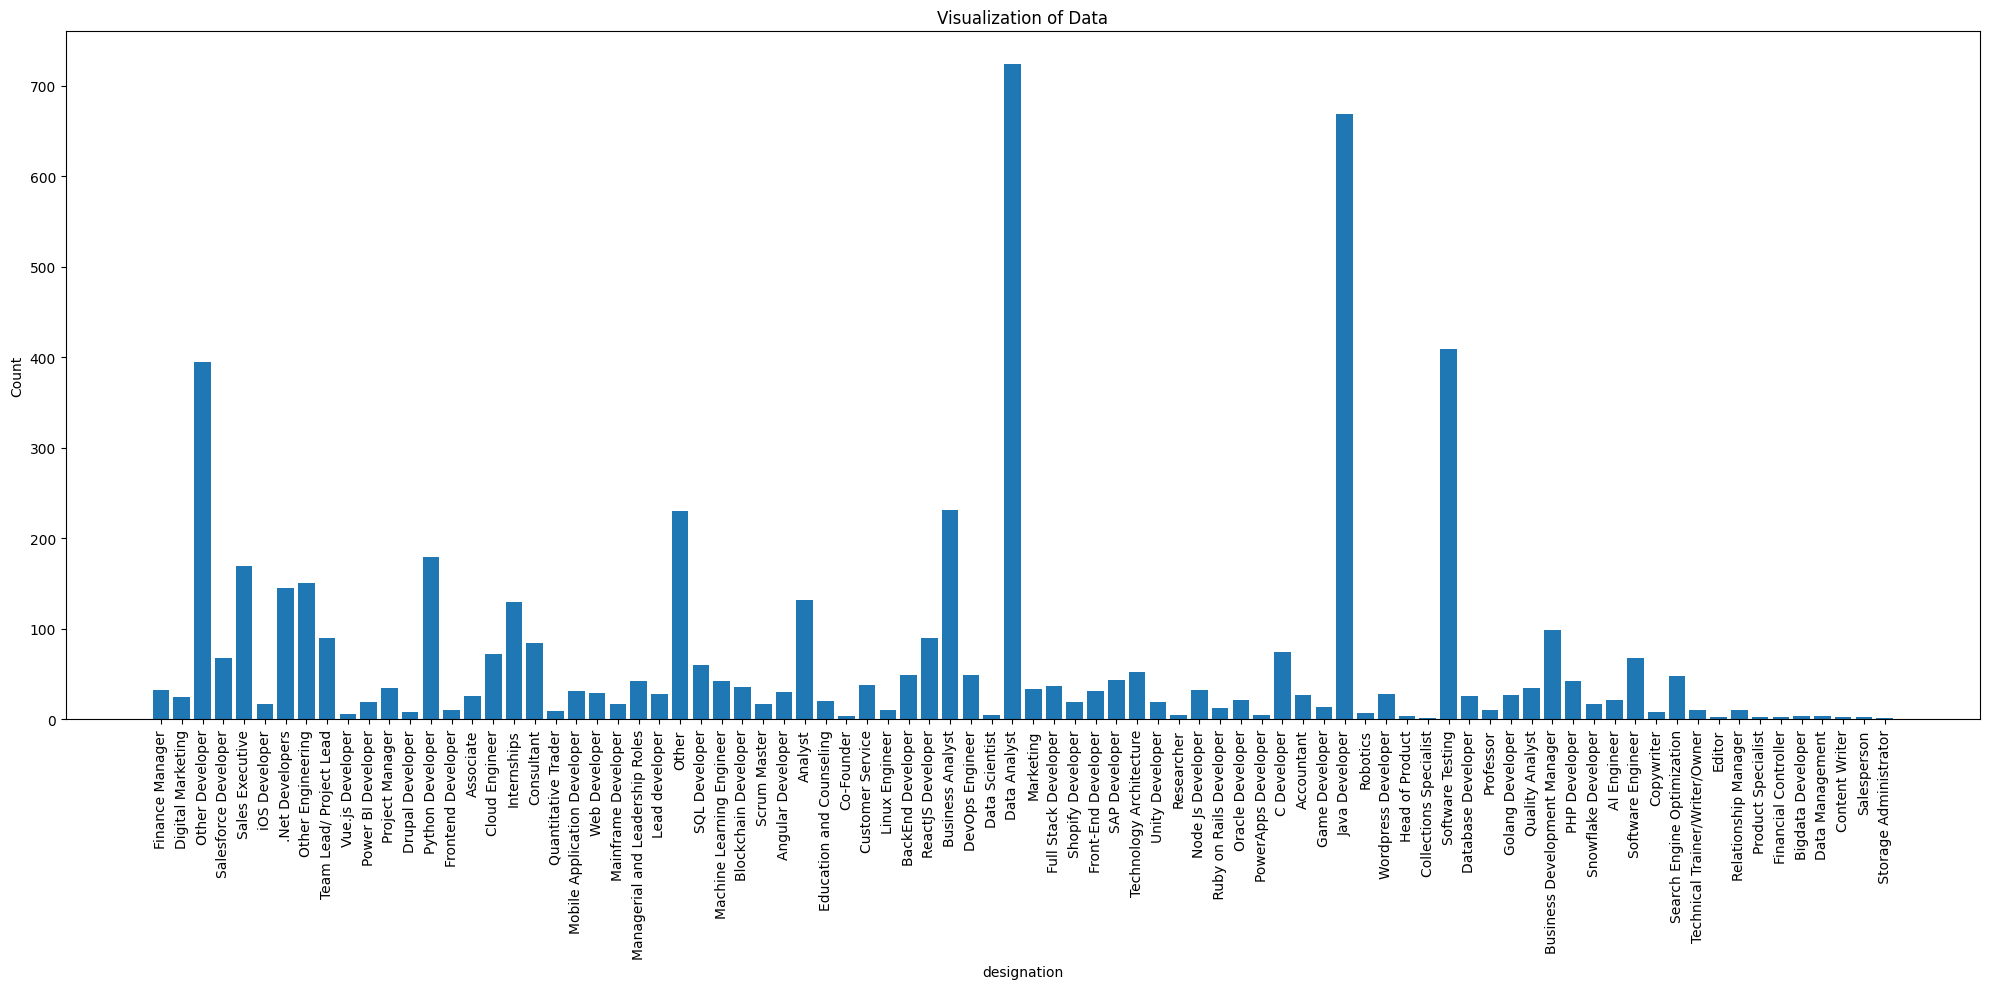

In [8]:
#How many employees have different types of jobs(Ex – It, Hardware)?
df = spark.sql('select  designation,Count(job_ID) from Job_Data group by designation')

df.show();

pandas_df = df.toPandas()

plt.figure(figsize=(20, 10))
plt.bar(pandas_df['designation'], pandas_df['count(job_ID)'])
plt.xlabel('designation')
plt.ylabel('Count')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

+--------------------+--------------------+--------------+
|               State|         designation|Employee_count|
+--------------------+--------------------+--------------+
|         Maharashtra|          Consultant|            12|
|               Bihar|   BackEnd Developer|             2|
|         Maharashtra|    Customer Service|             6|
|       Uttar Pradesh| Quantitative Trader|             2|
|          Tamil Nadu|    Oracle Developer|             1|
|               Bihar|         Internships|             1|
|             Gujarat|   Node Js Developer|             3|
|             Haryana|Blockchain Developer|             2|
|             Haryana|   Node Js Developer|             1|
|               Delhi|Full Stack Developer|             4|
|              Punjab|         C Developer|             3|
|               Delhi|       SQL Developer|             4|
|              Punjab|    Software Testing|             1|
|           Bengaluru|     DevOps Engineer|             

C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\1458861838.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


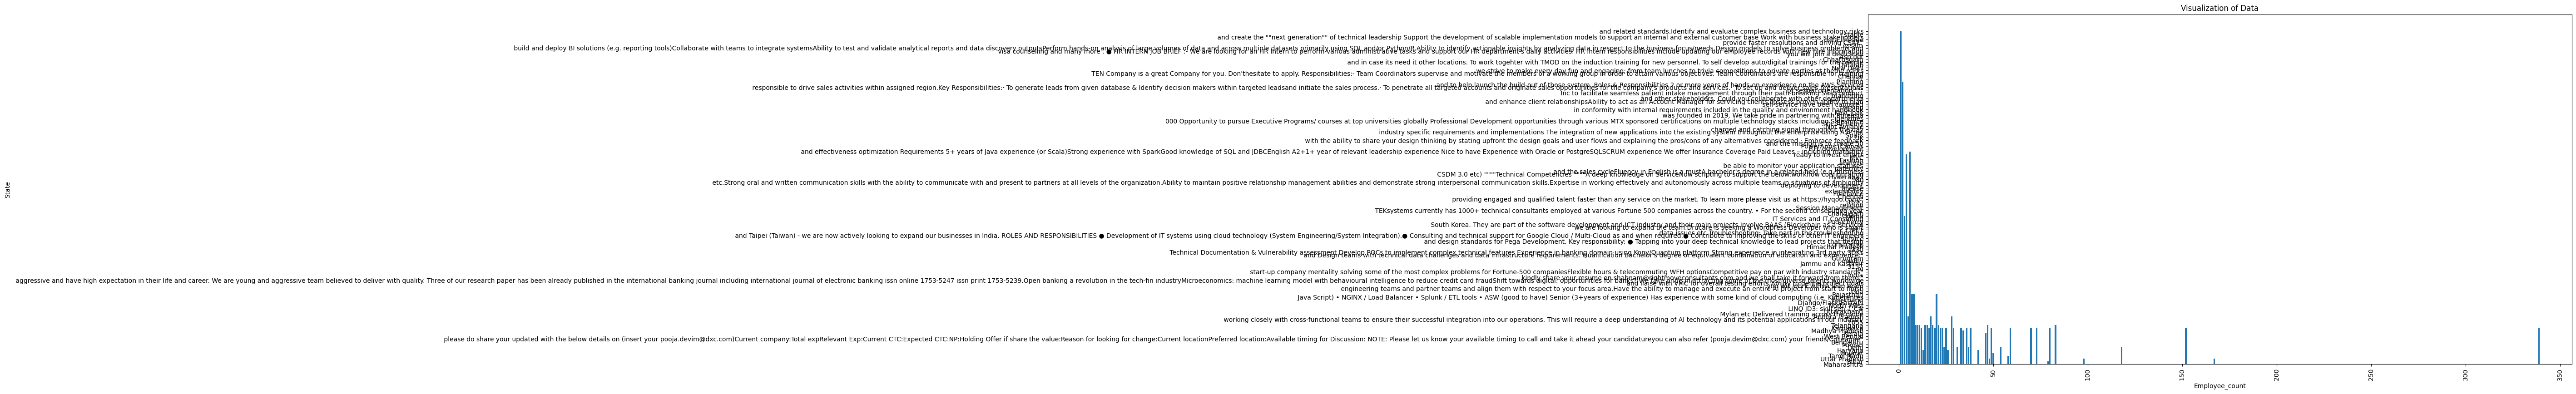

In [14]:
#Employees with different states and different types of Jobs
df = spark.sql('select State, designation,COUNT(job_ID) as Employee_count from Job_Data group by State,designation')

df.show();

pandas_df = df.toPandas()

plt.figure(figsize=(20, 10))
plt.bar(pandas_df['Employee_count'], pandas_df['State'])
plt.xlabel('Employee_count')
plt.ylabel('State')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

+-------------+--------------------+--------------+
|        state|         designation|employee_count|
+-------------+--------------------+--------------+
|  Maharashtra|          Consultant|             8|
|      Haryana|Blockchain Developer|             2|
|       Punjab|         C Developer|             3|
|        Delhi|       SQL Developer|             4|
|       Punjab|    Software Testing|             1|
|      Haryana|   Software Engineer|             5|
|Uttar Pradesh|        Data Analyst|             9|
|  West Bengal|   Digital Marketing|             1|
|Uttar Pradesh|      Cloud Engineer|             3|
|   Tamil Nadu|     .Net Developers|             5|
|    Karnataka| Snowflake Developer|             3|
|    Telangana|    Golang Developer|             1|
|    Telangana|    Python Developer|            10|
|Uttar Pradesh|    Oracle Developer|             3|
|    Karnataka|Technology Archit...|             8|
|   Tamil Nadu|Machine Learning ...|             1|
|       Kera

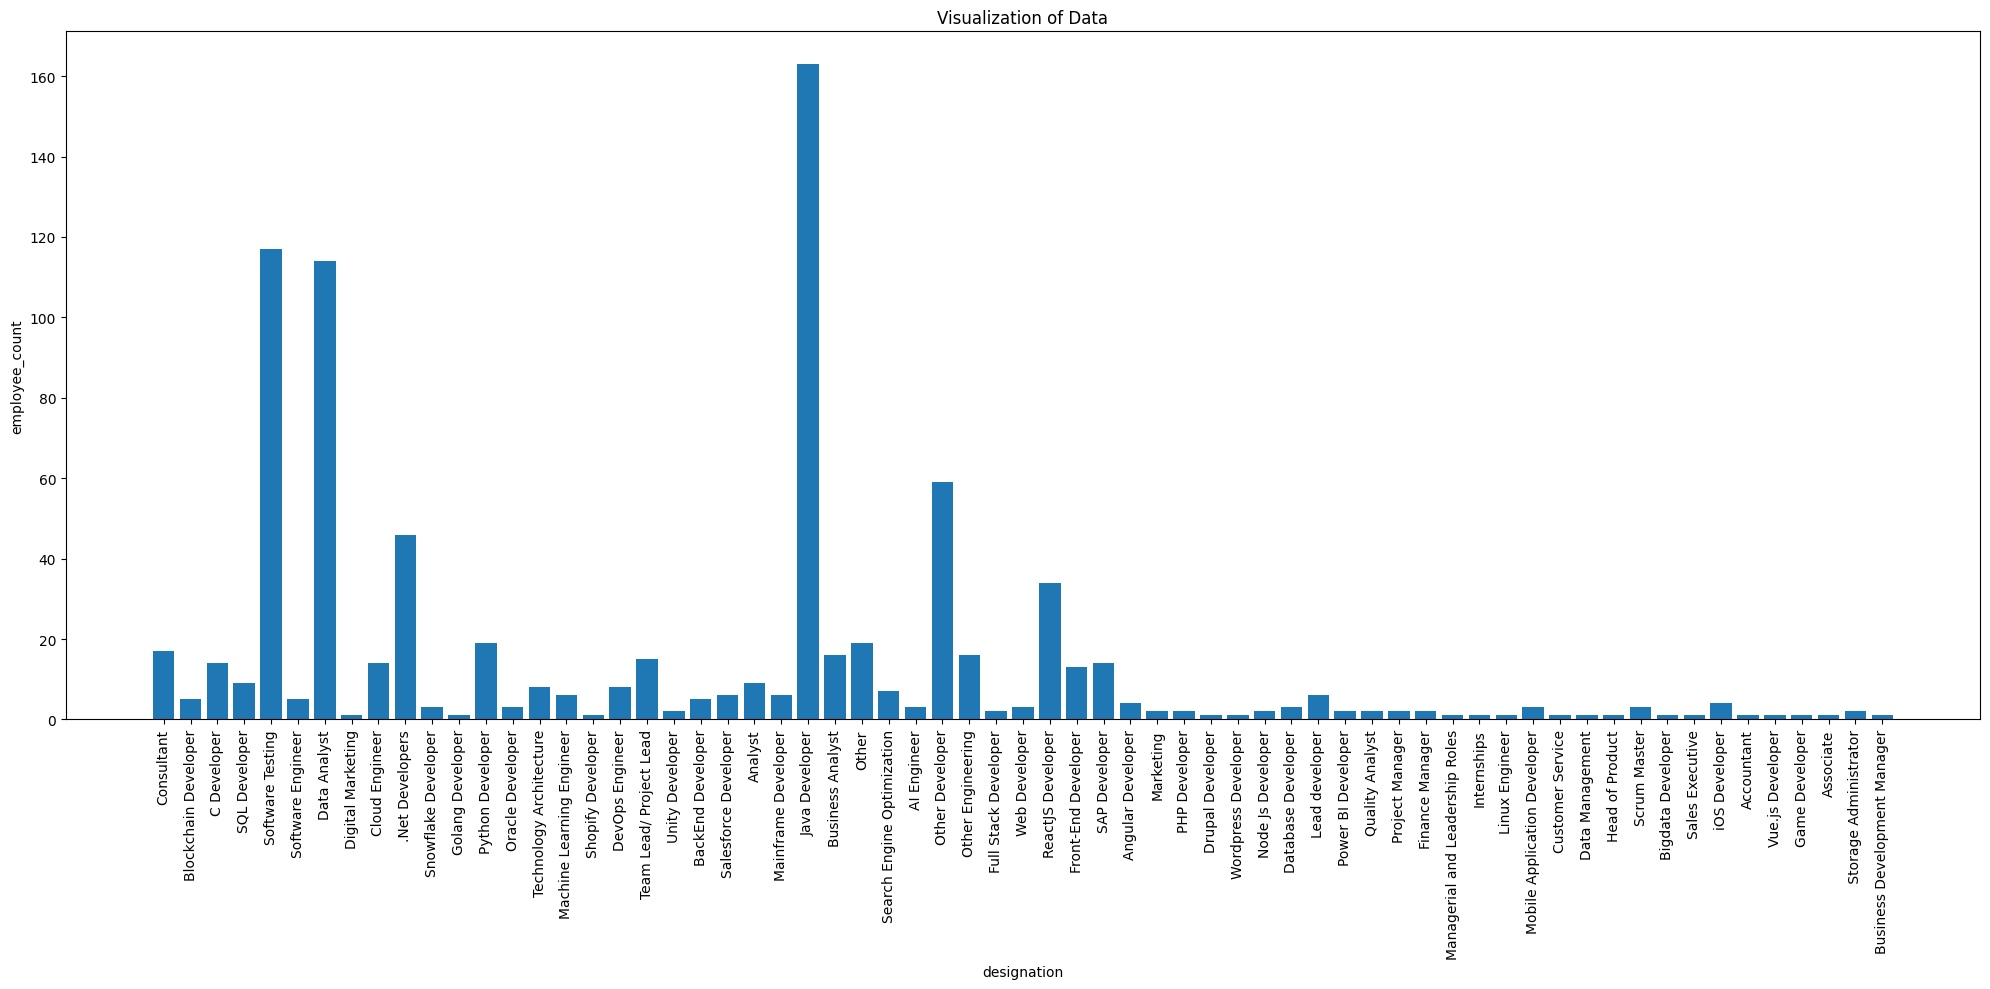

In [15]:
#How many employees have different designations in the It industry for different states?
df = spark.sql( "select state, designation, COUNT(job_ID) as employee_count FROM Job_Data WHERE industry = ' IT Services and IT Consulting' GROUP BY State, designation")

df.show();

pandas_df = df.toPandas()

plt.figure(figsize=(20, 10))
plt.bar(pandas_df['designation'], pandas_df['employee_count'])
plt.xlabel('designation')
plt.ylabel('employee_count')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

+--------------------+-------------+
|                name|max_followers|
+--------------------+-------------+
|            Tenthaid|          100|
|     VHM CONSULTANTS|        10019|
|               Emids|       100204|
|          TO THE NEW|       100409|
|            goGLOCAL|        10059|
|        Sattva Human|        10062|
|   Giant Eagle, Inc.|       100647|
|Proficon Medisol ...|         1007|
|          Mr. Cooper|       100742|
|Niveus Solutions ...|        10113|
|DIATOZ: Digital A...|        10133|
|Manav Rachna Inte...|        10133|
|              OnGrid|        10134|
|            Revenera|        10163|
|               Jabra|       101755|
|                 UKG|       101777|
|         Vazir Group|       101978|
|VSRK Capital Pvt....|         1024|
|   Arbelos Solutions|        10249|
|Travomint.com - S...|         1025|
+--------------------+-------------+
only showing top 20 rows



C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\3437227864.py:14: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  plt.tight_layout()
C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\3437227864.py:14: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\3437227864.py:14: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  plt.tight_layout()
C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\3437227864.py:14: UserWarning: Glyph 2369 (\N{DEVANAGARI VOWEL SIGN U}) missing from current font.
  plt.tight_layout()
C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\3437227864.py:14: UserWarning: Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from current font.
  plt.tight_layout()
C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\3437227864.py:14: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  plt.tight

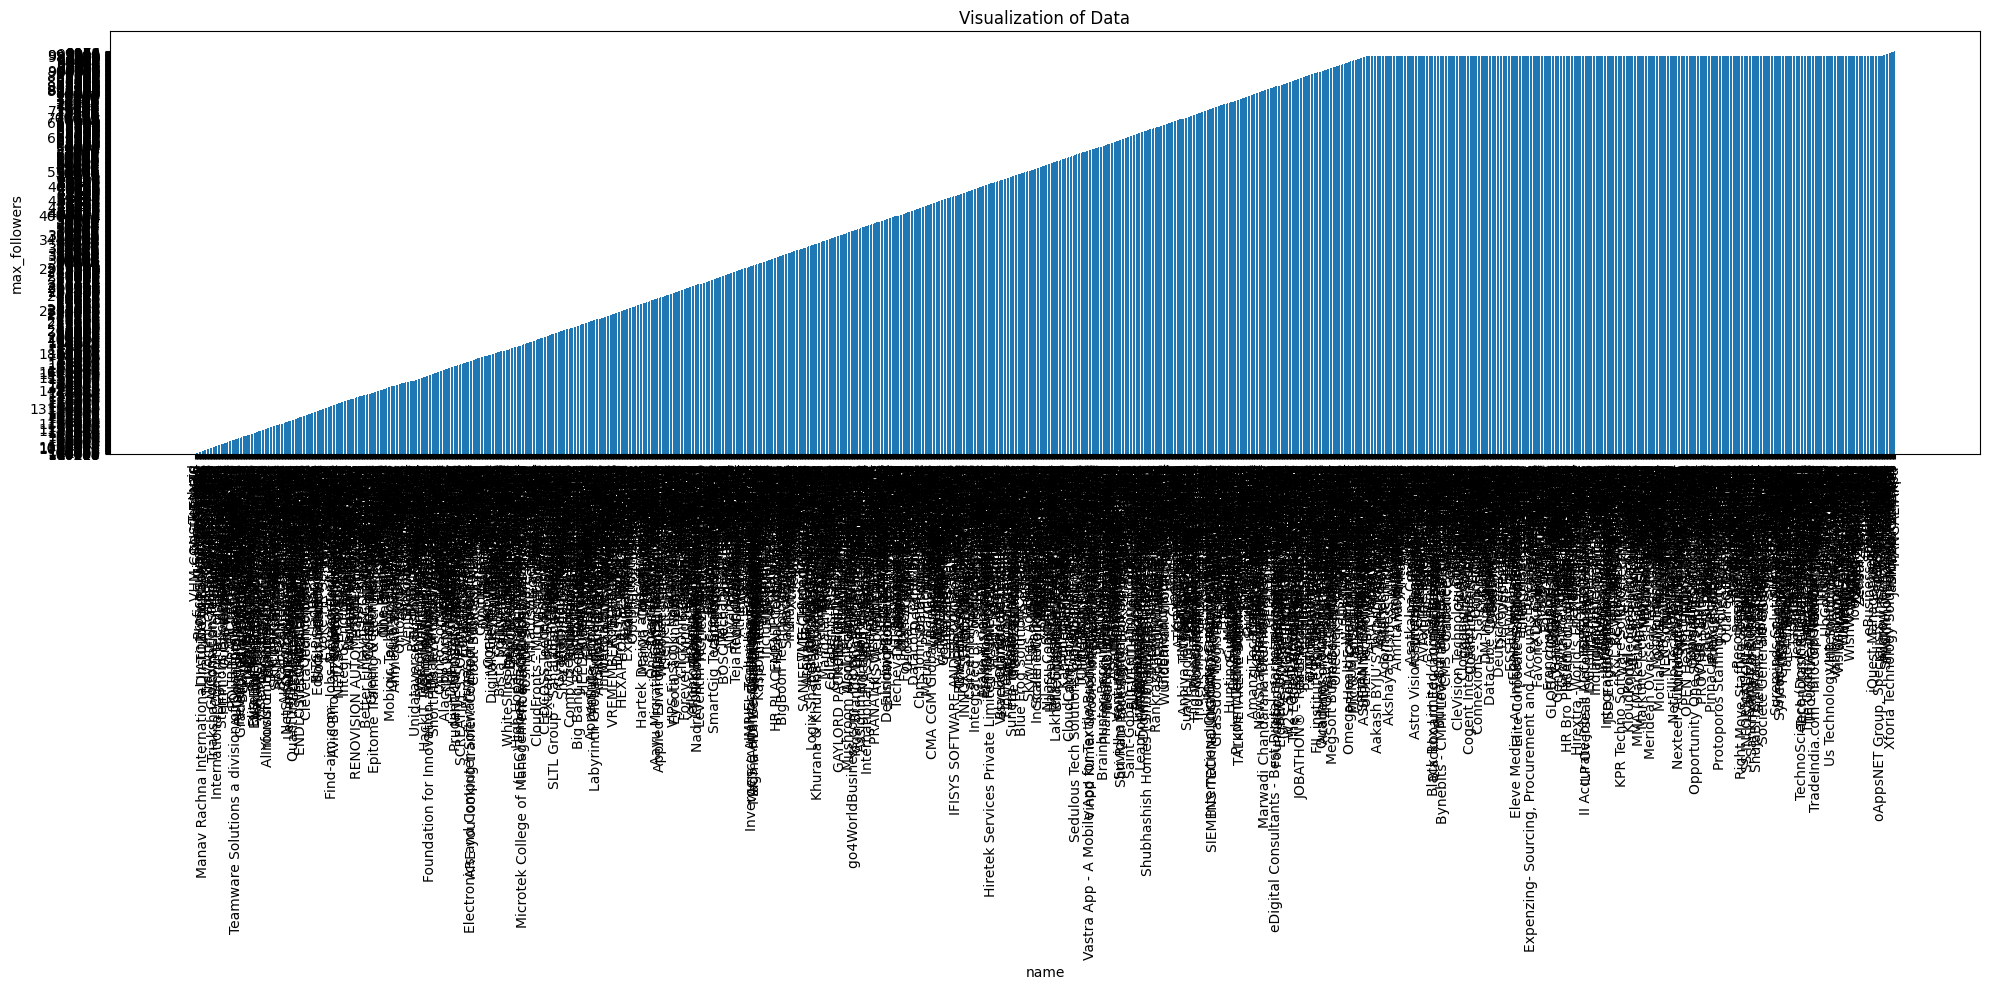

In [16]:
#Compare the LinkedIn followers for each company in the dataset to identify trends and popular companies.
df = spark.sql('SELECT name, MAX(linkedin_followers) as max_followers FROM Job_Data GROUP BY name ORDER BY max_followers')

df.show();

pandas_df = df.toPandas()

plt.figure(figsize=(20, 10))
plt.bar(pandas_df['name'], pandas_df['max_followers'])
plt.xlabel('name')
plt.ylabel('max_followers')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

+--------------------+-----------------------+
|         designation|count(total_applicants)|
+--------------------+-----------------------+
|     Finance Manager|                     33|
|   Digital Marketing|                     25|
|     Other Developer|                    395|
|Salesforce Developer|                     68|
|     Sales Executive|                    170|
|       iOS Developer|                     17|
|     .Net Developers|                    145|
|   Other Engineering|                    151|
|Team Lead/ Projec...|                     90|
|    Vue.js Developer|                      6|
|  Power BI Developer|                     19|
|     Project Manager|                     35|
|    Drupal Developer|                      8|
|    Python Developer|                    179|
|  Frontend Developer|                     11|
|           Associate|                     26|
|      Cloud Engineer|                     72|
|         Internships|                    130|
|          Co

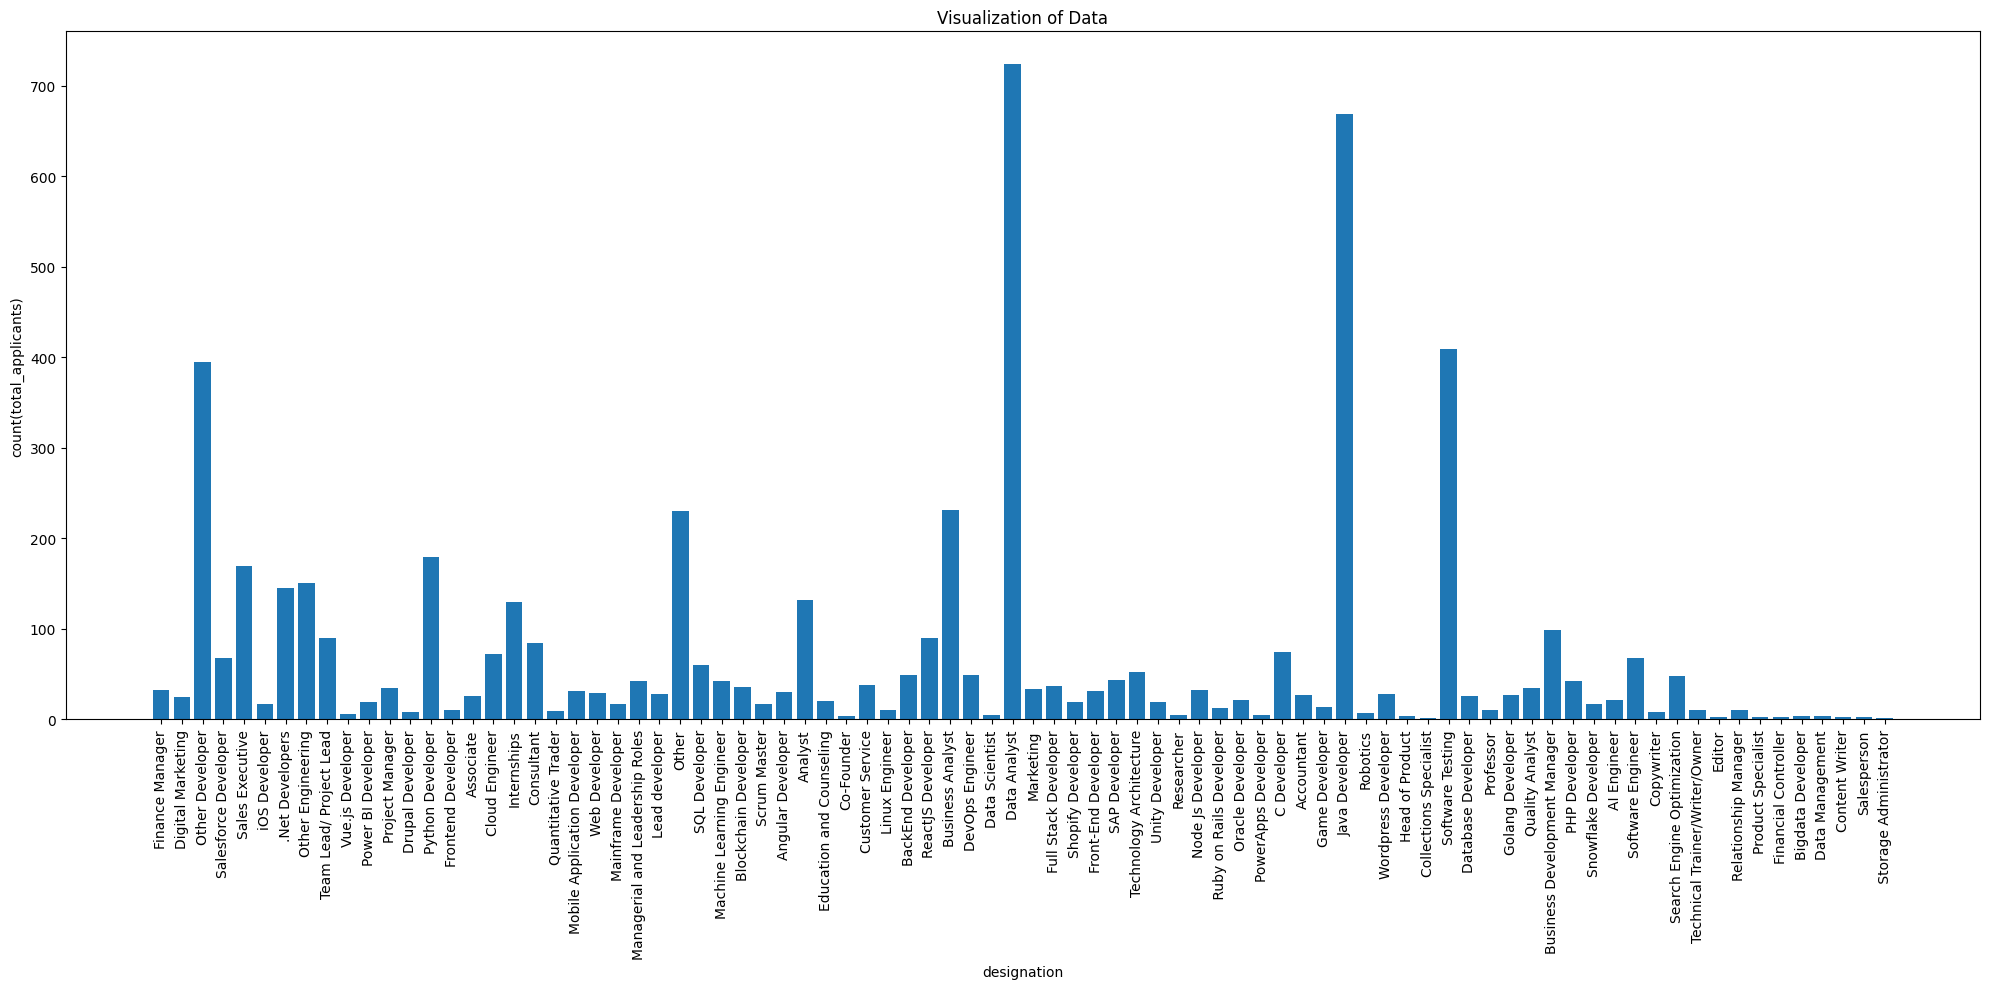

In [18]:
#Calculate the number of applicants based on job levels
df = spark.sql('Select designation ,count(total_applicants) from Job_Data group by designation')

df.show();

pandas_df = df.toPandas()

plt.figure(figsize=(20, 10))
plt.bar(pandas_df['designation'], pandas_df['count(total_applicants)'])
plt.xlabel('designation')
plt.ylabel('count(total_applicants)')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

+--------------------+--------------+
|                city|employee_count|
+--------------------+--------------+
|           Bengaluru|          1366|
|           Hyderabad|           410|
|            Gurugram|           361|
|               Delhi|           357|
|             Chennai|           325|
|              Mumbai|           313|
|                Pune|           264|
|               Noida|           204|
|           New Delhi|           178|
|              Kanpur|           155|
|             Lucknow|           145|
|               Patna|           130|
|           Ahmedabad|           121|
|           Ghaziabad|           114|
|               Kochi|            99|
|Greater Bengaluru...|            68|
|     Bangalore Urban|            67|
|              Jaipur|            65|
|       Visakhapatnam|            64|
|             Kolkata|            58|
+--------------------+--------------+
only showing top 20 rows



C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\344114806.py:14: UserWarning: Glyph 61623 (\uf0b7) missing from current font.
  plt.tight_layout()
C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\344114806.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\s549929\big-data-venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 61623 (\uf0b7) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


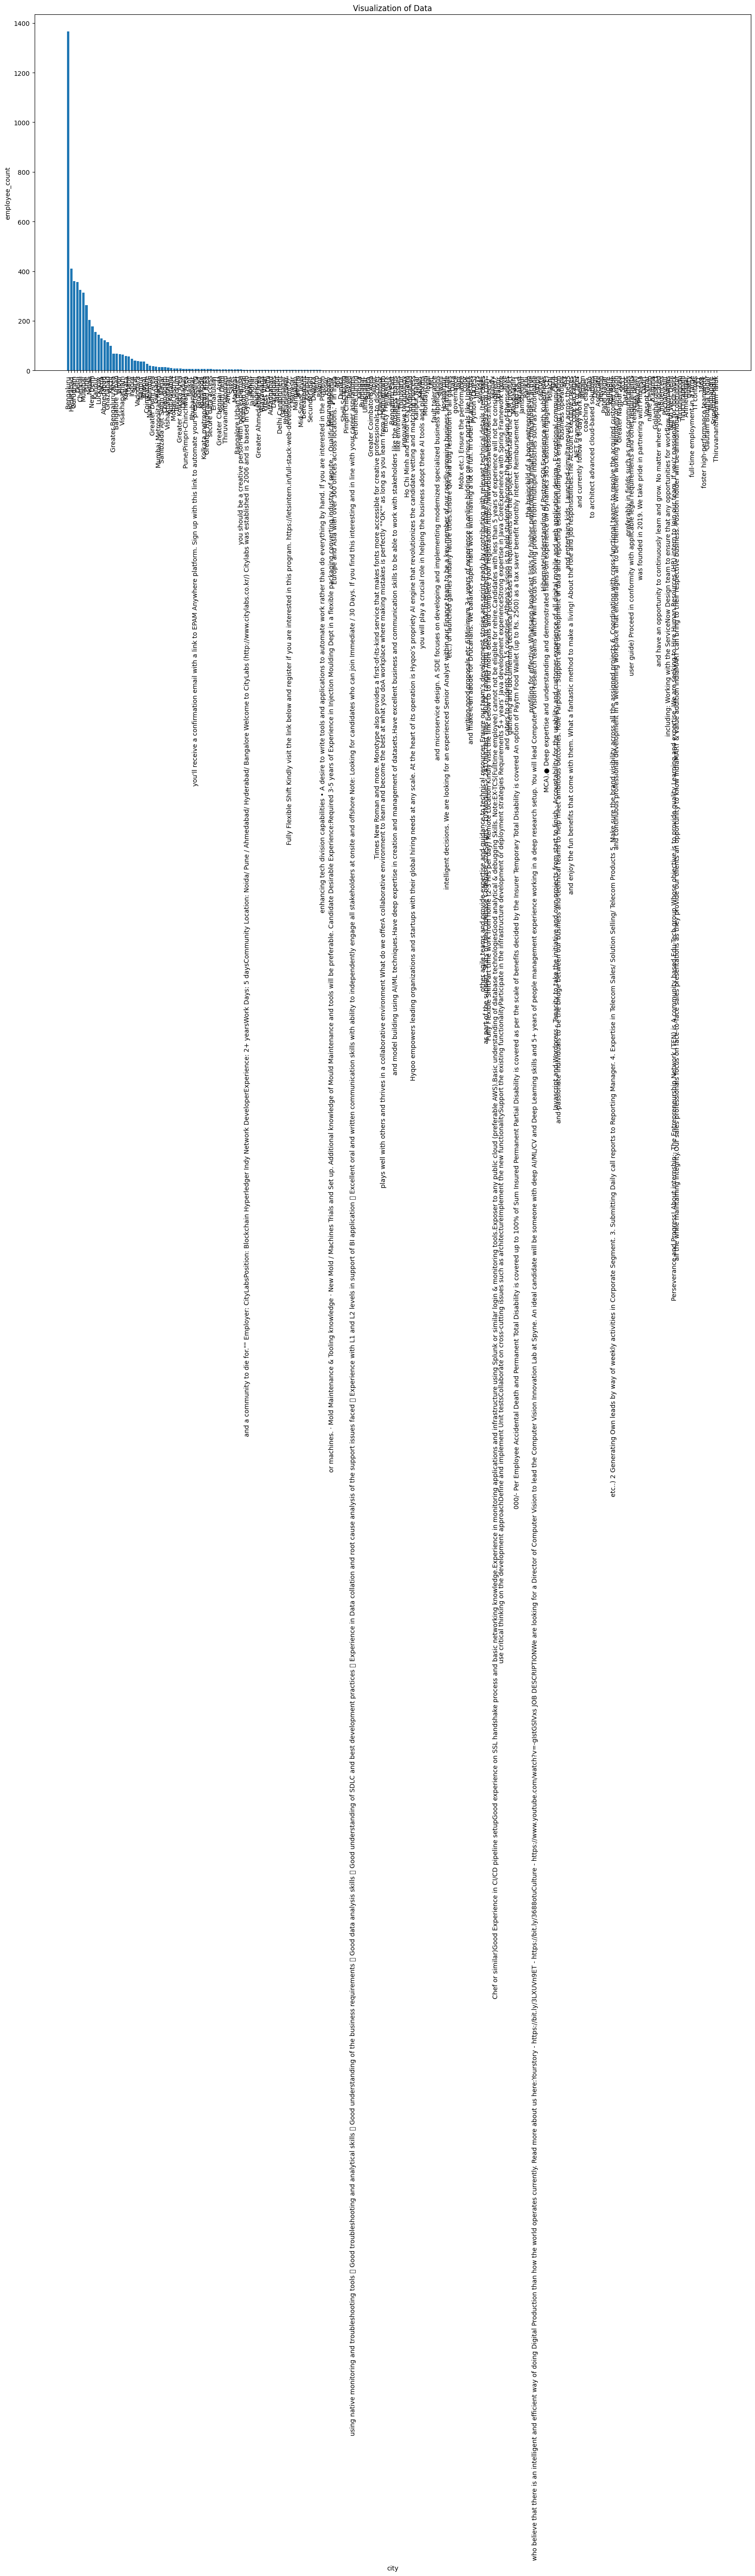

In [19]:
#Cities with the highest number of jobs
df = spark.sql('select city,count(*) as employee_count from Job_Data group by city order by employee_count desc')

df.show();

pandas_df = df.toPandas()

plt.figure(figsize=(20, 10))
plt.bar(pandas_df['city'], pandas_df['employee_count'])
plt.xlabel('city')
plt.ylabel('employee_count')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

+--------------------+------------+
|                name|count(level)|
+--------------------+------------+
|             Team HR|           1|
|Onward Technologi...|           3|
|             AppCake|           3|
|           Netradyne|           2|
|   AARCHIK SOLUTIONS|           1|
|              Haparz|           1|
|  VinCloud Solutions|           1|
|Jellyfish Technol...|           1|
|         Augment 3Di|           1|
|               Pixpa|           1|
|           Gamaka AI|           1|
|    Qualicentric LLP|           2|
|      Randstad India|           4|
|              Turing|           1|
|CEDCOSS Technolog...|           1|
|h3 Technologies, LLC|           1|
|         AsInt, Inc.|           1|
|              Unidef|           2|
|          Concentrix|           2|
|          Pronix Inc|           2|
+--------------------+------------+
only showing top 20 rows



C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\146254452.py:14: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  plt.tight_layout()
C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\146254452.py:14: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\146254452.py:14: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  plt.tight_layout()
C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\146254452.py:14: UserWarning: Glyph 2369 (\N{DEVANAGARI VOWEL SIGN U}) missing from current font.
  plt.tight_layout()
C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\146254452.py:14: UserWarning: Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from current font.
  plt.tight_layout()
C:\Users\s549929\AppData\Local\Temp\ipykernel_12636\146254452.py:14: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  plt.tight_layou

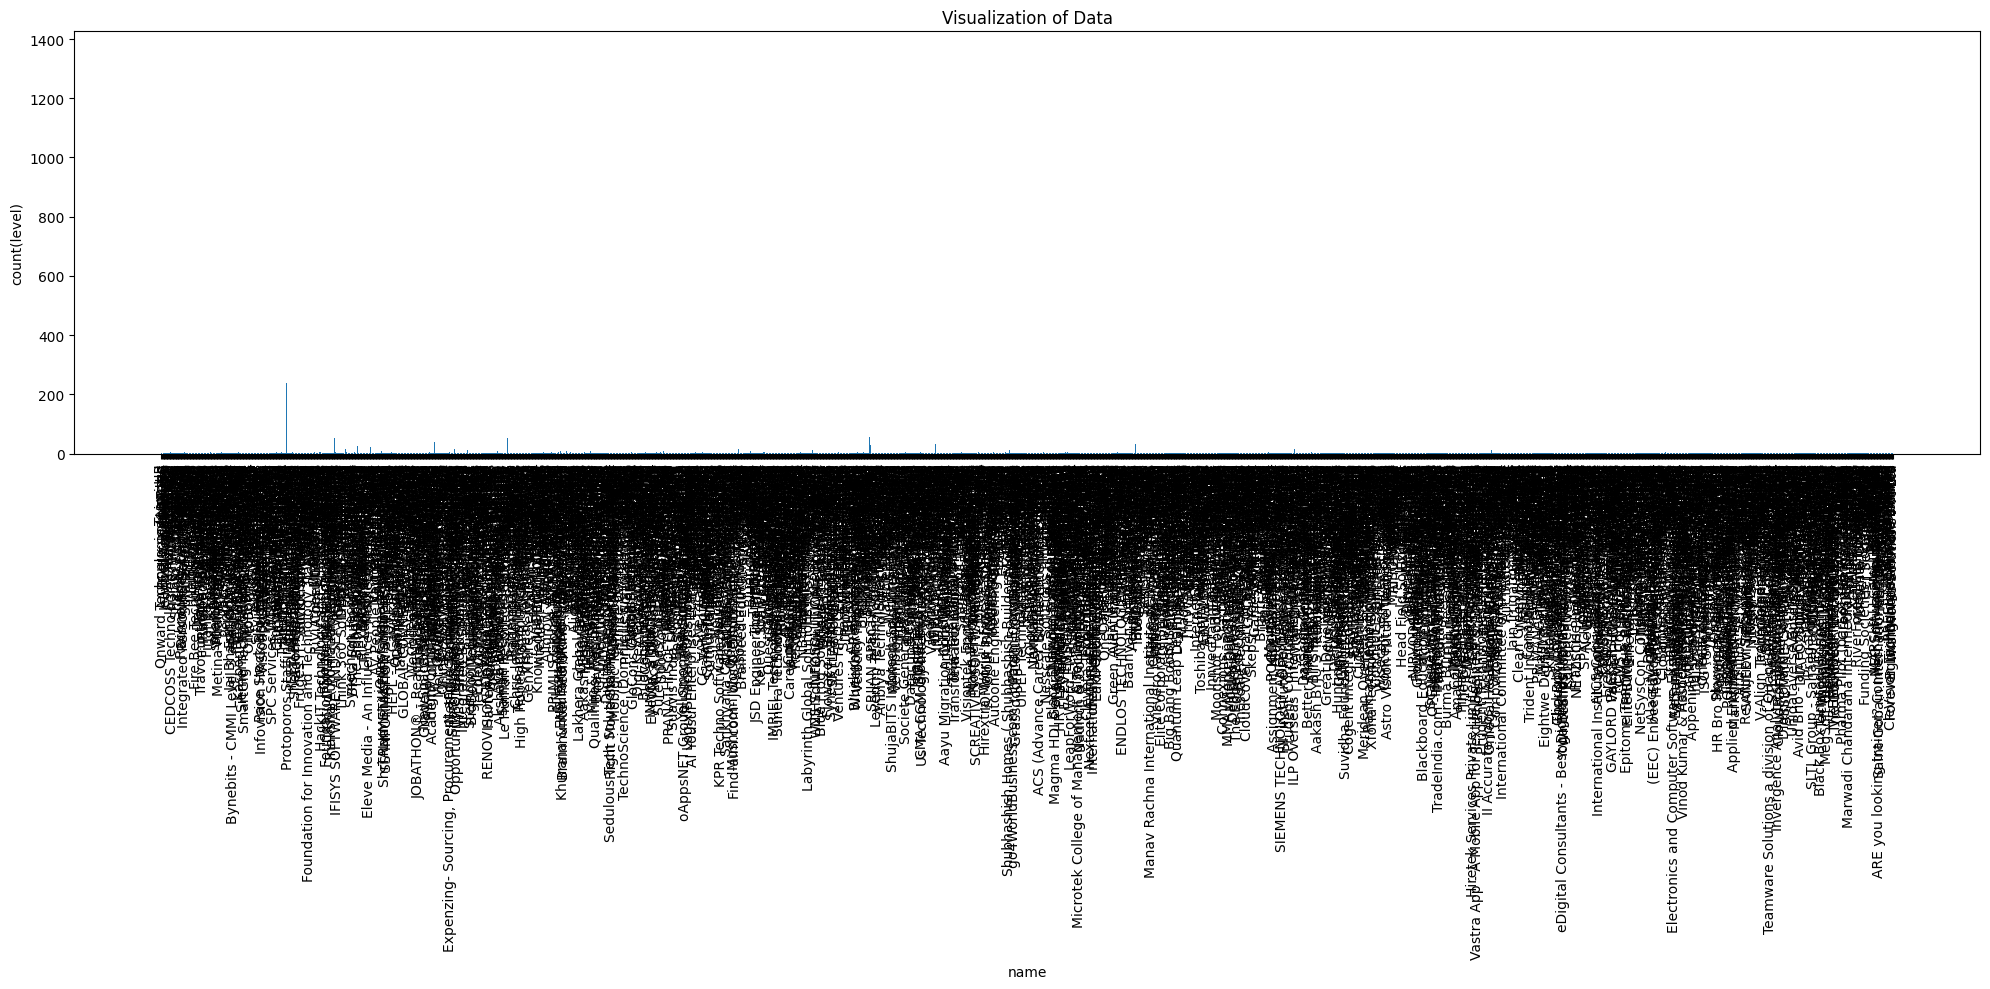

In [20]:
#Companies having different employee levels
df = spark.sql('select name,count(level) from Job_Data group by name ')

df.show();

pandas_df = df.toPandas()

plt.figure(figsize=(20, 10))
plt.bar(pandas_df['name'], pandas_df['count(level)'])
plt.xlabel('name')
plt.ylabel('count(level)')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
